# COGS 108 - Predicting Power Outage Duration

# Overview

This year specifically, there have been numerous power outages across the state of California due to weather conditions, sustainability, supply, etc. This led us to analyze what variable had the greatest influence on the power outage duration, and whether or not we would be able to use these variables to predict if a power outage would be severe. We hypothesized that the cause of severe weather would have the greatest impact on power outage duration and that we would be able to predict the level of severity using the Region, Climate, and Cause as inputs to the classifier. We had found out that severe weather was not the greatest significant predictor and that the cause of fuel supply emergency was a more significant predictor. Additionally, we had generated our classifier and found that it was, at best, only around 40% accuracy with test data (data that was withheld while fitting the model), therefore, with our current data set, we are skeptical whether or not we would be able to predict the level of severity using these three attributes as inputs.

# Names

- Kaishun Lin
- Yuheng Yang
- Yicun Wu
- Kasen Teoh

# Research Question

Taking each variable separately, how does the region (i.e northeast, southwest, etc.), climate (i.e normal, warm, cold), and cause (i.e weather, intentional attack, etc.) affect the duration of power outage across the United States and are we able to predict a range for the power outage duration based on these three variables with at least a 60% accuracy?

## Background and Prior Work

Electricity is extremely essential to our daily lives. We rely on electricity to allow us to see in the dark, to drive in the dark, it allows for better safety and control. However, the control of electricity is especially hard in the sense that it may not always be able to provide us with what we seek from it. For instance, in states with extreme weather such as Chicago with heavy snowstorms or Arizona with extreme heat, power outages are bound to happen. From the climate map provided by the government (1), we see that the southeastern USA and a bit of southern California and southern Arizona have the highest temperatures currently. Additionally, we can see from the map that the Northern parts of the United States have the lowest recorded temperatures. We believe that these areas will have power outages due to the severe weather. Furthermore, from the poweroutage.us (2) website, we are able to see which states currently have the most power outages. For instance, currently, Washington state has the most power outages. We believe this is because the Winter season is coming and Washington is known for its heavy rainfall. Consequently, we believe that this severe weather is responsible for a portion of the power outages originating from Washington.

This question is important to us because our livelihoods rely on electricity. Without electricity, we have no internet to entertain ourselves, we have no service to communicate, and so much more. By analyzing power outages across the country we will have a better understanding of how the region, climate, and cause influences power outages. The region of the states is the geographical location of the state, whether in the Northeast, West, South, etc. The climate of the state means whether the overall climate of the state is normal or cold or warm. The cause we will be analyzing is whether it was due to severe weather or intentional attacks, or a lack of supplies, etc. Upon completion of this analysis, we would be able to see which factor has a bigger impact on power outage, whether region, climate, or cause, and if we would be able to use these three variables as inputs to predict the severity level (1: low - 5: high). When predicting the severity level of a power outage, we are using these three variables as inputs and generating an outage duration number as the output. We will then group the original outage duration and the predicted outage duration into five levels and compare these levels of severity against each other. 

A similar project that has been performed is the Power Outage Predictor (3), linked below. The group that had done the Power Outage Predictor and only incorporated weather conditions, such as wind speed humidity, temperature, and etc. Their project is only limited to the data of the Washington State. Our project differs in the sense that we are analyzing more attributes than just weather, such as region, climate, and the cause, and predicting the level of severity based on how long a power outage would last given the three inputs. Additionally, we are applying our model to the entire country, not just limited to one state. The group had implemented tree classifications, SVMs, and neural networks to predict the probability of a major power outage, with the work major being broken down into three different groups of normal with 0 - 2 outages, bad with 3 - 7 outages, and extreme with 8 or more outages in that area. The group's predicting accuracy did encounter a few problems, such as a small dataset and their predictors containing false positives and negatives.

References:
- 1) https://www.weather.gov/forecastmaps
- 2) https://poweroutage.us/
- 3) https://github.com/rkastilani/PowerOutagePredictor

# Hypothesis


Considering the region, climate, and cause as three separate attributes, we believe the cause, specifically severe weather will have the largest impact on power outage duration because it is the one that is the most unknown factor and electric companies are unable to fully 100% prepare for weather disasters. We also believe that we will be able to utilize Linear Regression to predict the severity level of each power outage observation, using the region, climate, and cause as inputs with at least a 60% accuracy.

# Dataset(s)

- Dataset Name: Major Power Outage Risks in the US
- Link to the dataset: https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks
- Number of observations: 1534

In this dataset made public by Purdue University, it contains 1534 observations with 55 attributes. Each observation has a location, climate, region, duration, and etc (if the field is blank it is simply filled with nan). We made sure check the data for any personal identifiable information and removed any if came across. 

The observations are from power outages across the United States (Alsaka and Hawaii included) from January 2000 to July 2016. 

# Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import patsy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Data Cleaning

As seen from the description of the data, the data set contains 55 attributes. Because all of these 55 attributes do not directly relate to our question, we can drop these columns because they are not adding any additionally information

In [2]:
df = pd.read_excel('http://engineering.purdue.edu/LASCI/research-data/outages/outage') #Reading in the dataset
df = df.iloc[4:].reset_index(drop = True) #Removing the first 4 lines because those were just information about the dataset
df.columns = df.iloc[0,:] #Setting the header
df = df.iloc[2:,2:].reset_index(drop = True)
df.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,2011-07-01 00:00:00,17:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
1,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,2014-05-11 00:00:00,18:38:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
2,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,2010-10-26 00:00:00,20:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
3,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,2012-06-19 00:00:00,04:30:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
4,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,2015-07-18 00:00:00,02:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874


In [3]:
df = df[['POSTAL.CODE', 'CLIMATE.REGION', 'CLIMATE.CATEGORY', 'CAUSE.CATEGORY', 'CAUSE.CATEGORY.DETAIL', 'OUTAGE.DURATION']]
df.columns = ['State', 'Region', 'Climate', 'Cause', 'Cause_Detail', 'Outage_Duration_Mins']
df = df.astype({'Outage_Duration_Mins': 'float64'})

In [4]:
df = df.drop(df[df['Cause'].isnull()].index)
df = df.drop(df[df['Outage_Duration_Mins'].isnull()].index).reset_index(drop = True)
df

,State,Region,Climate,Cause,Cause_Detail,Outage_Duration_Mins
0,MN,East North Central,normal,severe weather,NaN,3060.0
1,MN,East North Central,normal,intentional attack,vandalism,1.0
2,MN,East North Central,cold,severe weather,heavy wind,3000.0
3,MN,East North Central,normal,severe weather,thunderstorm,2550.0
4,MN,East North Central,warm,severe weather,NaN,1740.0
...,...,...,...,...,...,...
1471,ID,Northwest,warm,intentional attack,sabotage,0.0
1472,ID,Northwest,normal,system operability disruption,uncontrolled loss,220.0
1473,ND,West North Central,cold,public appeal,NaN,720.0
1474,SD,West North Central,warm,islanding,NaN,59.0


In the cell above, we are dropping the observations with an unknown cause and duration because we want to use cause as one of our predictor variables to predict duration. We are unable to infer or fill in the missing values for both of these variables, therefore, we can only drop them as they do not add any information to our analysis.

In [5]:
df['Cause'].value_counts()

severe weather                   744
intentional attack               403
system operability disruption    123
public appeal                     69
equipment failure                 55
islanding                         44
fuel supply emergency             38
Name: Cause, dtype: int64

We see in the cell above that the 'Cause' column does not have any repetitive categories, therefore, we do not need to group categories together. 

In [6]:
print('There are', df['Cause_Detail'].value_counts().count(), 'different values')
df['Cause_Detail'].value_counts()

There are 51 different values


vandalism                    325
thunderstorm                 176
winter storm                 100
hurricanes                    73
heavy wind                    60
storm                         41
sabotage                      29
wildfire                      23
winter                        23
transmission interruption     19
generator trip                16
uncontrolled loss             14
snow/ice                      13
wind/rain                     12
heatwave                      10
tornadoes                      8
 Natural Gas                   7
 Coal                          7
transmission trip              6
wind storm                     6
Coal                           6
flooding                       4
breaker trip                   4
earthquake                     4
transmission                   3
hailstorm                      3
lightning                      3
suspicious activity            3
Hydro                          3
distribution interruption      2
wind      

In the cell above, we see that there are 51 different values in the 'Cause_Detail' column. Additionally, we see repetitive categories that describe the same cause of the outage. For isntance, there is a category titled 'snow/ice storm' and 'snow/ice', there is also a 'wind', 'wind storm', and 'wind/rain'. Because with many categories, the categories become too specific and detailed that only fit a few observation's situations, which lead to many categories having very few observations, as seen above. To lessen the categories, we group some of the 'Cause_Detail' categories. 

In [7]:
def grouping_cause_detail(category):
    
    groups = {'thunderstorm': 'thunder/lightning', 'lightning': 'thunder/lightning', 
              'winter': 'snow/ice', 'snow': 'snow/ice', 'hail': 'snow/ice', 'wind': 'wind/rain', 
              'storm': 'wind/rain', 'sabotage': 'attack', 'suspicious activity': 'attack', 'fog': 'wind/rain', 
              'vandalism': 'attack', 'trip': 'soft/hard ware', 
              'interruption': 'soft/hard ware', 'transformer outage': 'soft/hard ware', 
              'distribution outage': 'soft/hard ware', 'hardware': 'soft/hard ware', 
              'malfunction': 'soft/hard ware', 'fault': 'soft/hard ware', 'load': 'loadshed/transmission', 
              'voltage': 'loadshed/transmission', 'transmission': 'loadshed/transmission', 
              'shutdown': 'soft/hard ware', 'cables': 'soft/hard ware', 'switching': 'soft/hard ware'}
    
    if not pd.isnull(category):
        new = category.lower().strip()
        for i in groups.keys():
            if i in new:
                new = groups[i]
                break
    else:
        new = category

    return new

df['Cause_Detail'] = df['Cause_Detail'].apply(grouping_cause_detail)
df = df.drop(df[df['Cause_Detail'].isin(['petroleum', 'public appeal', 'substation'])].index)
df['Cause_Detail'].value_counts()

attack                   357
thunder/lightning        180
snow/ice                 140
wind/rain                122
hurricanes                73
soft/hard ware            59
wildfire                  23
uncontrolled loss         14
coal                      13
heatwave                  10
tornadoes                  8
natural gas                7
loadshed/transmission      6
earthquake                 4
hydro                      4
flooding                   4
Name: Cause_Detail, dtype: int64

Looking at the cell above, we have grouped many of the 'Cause_Detail' values together, reducing the very specific categories with very few observations. We had also removed the three observations with the value of 'Petroleum', 'Public appeal, and 'Substation'. We had chosed to remove these because these values are unable to be grouped with other values and because each value only had one observation, therefore, they do not add any additionaly information to our study. 

In [8]:
print("There are", df['Region'].value_counts().count(), 'different regions')
df['Region'].unique()

There are 9 different regions


array(['East North Central', 'Central', 'South', 'Southeast', 'Northwest',
       'Southwest', 'Northeast', 'West North Central', 'West', nan],
      dtype=object)

In [9]:
df[df['Region'].isnull()]

,State,Region,Climate,Cause,Cause_Detail,Outage_Duration_Mins
1460,HI,NaN,cold,severe weather,thunder/lightning,1367.0
1461,HI,NaN,normal,severe weather,NaN,174.0
1462,HI,NaN,warm,severe weather,earthquake,543.0
1463,HI,NaN,normal,system operability disruption,NaN,237.0
1464,HI,NaN,warm,severe weather,earthquake,1906.0


We see that there are 9 categories of regions. As stated above, too specific labeling is bad because there would only be a few observations with that category. We decided that anything with the word central would be grouped into central. For instance, instead of having east north central, and west north central and central, we decided that central should not be split up into different categories, so we decided to clean and replace these regions with just central. 

We also see above that there are four observations with an unknown 'Region' value. Because all of these observations are in Hawaii and rather than creating a new region just for Hawaii, we decided to categorize Hawaii and a 'west' region because it is in the Western United States. 

In [10]:
def grouping_region(region):
    group = {'entral': 'Central'}
    
    if not pd.isnull(region):
        new = region.strip()
        for i in group.keys():
            if i in region:
                new = group[i]
    else:
        new = 'West'
        
    return new

df['Region'] = df['Region'].apply(grouping_region)
df

,State,Region,Climate,Cause,Cause_Detail,Outage_Duration_Mins
0,MN,Central,normal,severe weather,NaN,3060.0
1,MN,Central,normal,intentional attack,attack,1.0
2,MN,Central,cold,severe weather,wind/rain,3000.0
3,MN,Central,normal,severe weather,thunder/lightning,2550.0
4,MN,Central,warm,severe weather,NaN,1740.0
...,...,...,...,...,...,...
1471,ID,Northwest,warm,intentional attack,attack,0.0
1472,ID,Northwest,normal,system operability disruption,uncontrolled loss,220.0
1473,ND,Central,cold,public appeal,NaN,720.0
1474,SD,Central,warm,islanding,NaN,59.0


# EDA

After cleaning the data, we have a total of 1472 observations and 6 variables, 'Region', 'Climate', 'Cause', 'Cause_Detail', 'Outage_Duration_Mins'. 

In [11]:
df.shape

(1472, 6)

In [12]:
df[df.duplicated(keep = False)]

,State,Region,Climate,Cause,Cause_Detail,Outage_Duration_Mins
23,TN,Central,cold,severe weather,snow/ice,150.0
29,TN,Central,normal,intentional attack,attack,1.0
41,TN,Central,cold,severe weather,snow/ice,150.0
43,TN,Central,normal,intentional attack,attack,1.0
62,WI,Central,cold,intentional attack,attack,60.0
...,...,...,...,...,...,...
1347,CT,Northeast,normal,intentional attack,attack,1.0
1401,ME,Northeast,normal,intentional attack,attack,0.0
1406,ME,Northeast,normal,intentional attack,attack,0.0
1425,NH,Northeast,normal,intentional attack,attack,0.0


From the cell above, we see that there are a total of 161 observations that are duplicated at least once. However, we choose not to remove the duplicated observations because we are not entirely sure that they are duplicated. When reducing the number of labels in the 'Cause_Detail' and 'Region' column, we could have possibly grouped data together making them seem like duplicates when they originally were not. 

In [13]:
print(df['Region'].value_counts())
print('\nThere are', df['Region'].isnull().sum(), 'observations in the \'Regions\' columns with missing values')


Central      344
Northeast    343
South        217
West         209
Southeast    150
Northwest    122
Southwest     87
Name: Region, dtype: int64

There are 0 observations in the 'Regions' columns with missing values


In [14]:
print(df['Climate'].value_counts())
print('\nThere are', df['Climate'].isnull().sum(), 'observations in the \'Climate\' columns with missing values')


normal    729
cold      463
warm      280
Name: Climate, dtype: int64

There are 0 observations in the 'Climate' columns with missing values


In [15]:
print(df['Cause'].value_counts())
print('\nThere are', df['Cause'].isnull().sum(), 'observations in the \'Cause\' columns with missing values')


severe weather                   743
intentional attack               403
system operability disruption    123
public appeal                     69
equipment failure                 53
islanding                         44
fuel supply emergency             37
Name: Cause, dtype: int64

There are 0 observations in the 'Cause' columns with missing values


In [16]:
print(df['Cause_Detail'].value_counts())
print('\nThere are', df['Cause_Detail'].isnull().sum(), 'observations in the \'Cause_Detail\' columns with missing values')


attack                   357
thunder/lightning        180
snow/ice                 140
wind/rain                122
hurricanes                73
soft/hard ware            59
wildfire                  23
uncontrolled loss         14
coal                      13
heatwave                  10
tornadoes                  8
natural gas                7
loadshed/transmission      6
earthquake                 4
hydro                      4
flooding                   4
Name: Cause_Detail, dtype: int64

There are 448 observations in the 'Cause_Detail' columns with missing values


In [17]:
print(df['Outage_Duration_Mins'].describe())
print('\nThe median outage duration time in minutes is', df['Outage_Duration_Mins'].median())
print('\nThere are', df['Outage_Duration_Mins'].isnull().sum(), 'observations in the \'Outage_Duration_Mins\' columns with missing values')

count      1472.000000
mean       2630.324728
std        5949.472952
min           0.000000
25%         103.000000
50%         711.000000
75%        2880.000000
max      108653.000000
Name: Outage_Duration_Mins, dtype: float64

The median outage duration time in minutes is 711.0

There are 0 observations in the 'Outage_Duration_Mins' columns with missing values


From the cells above, starting with the 'Region', we see that there are 7 different regions where the data was taken from, with the 'Northeast' and 'Central' regions comprising almost half of the data. For the 'Climate' column, we see that there are only three different climates in which the data can originate from, 'normal', 'warm', or 'cold', with 'normal' being the biggest contributor. As for the 'Cause' column, there are only 7 different categories in which the cause of the problem can be categorized as, ranging from system distribution and hardware malfunction to intentional attacks and severe weather. The 'Cause_Detail' column goes into further detail listing out what was the actual cause of the power outage. 

For the 'Outage_Duration_Mins' column, we see that the mean is 2625.39 minutes while the median is only 701 minutes. Because of the difference in the mean and median values, this leads us to believe that there are outliers present in the data, causing the mean value to be much greater than the median. 

Because there are outliers in the data, we want to see how the distribution looks like

Text(0, 0.5, 'Frequency')

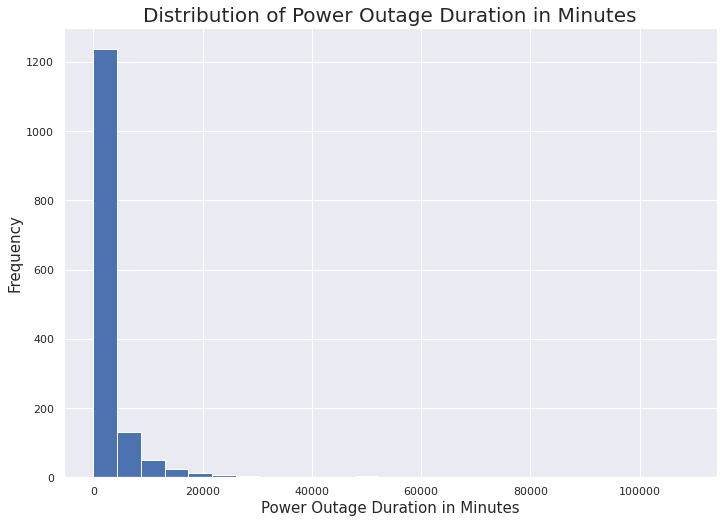

In [18]:
ax = df['Outage_Duration_Mins'].plot(kind = 'hist', bins = 25)
ax.set_title('Distribution of Power Outage Duration in Minutes', fontsize = 20)
ax.set_xlabel("Power Outage Duration in Minutes", fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)

From the cell above, we see that the data really isn't evenly spread with most of the data points being around 5000 minutes. To fix this and make the data form a more normal distribution, we apply a log transformation to the data

In [19]:
def change(num):
    if num<=0:
        return 1
    else:
        return int(np.log(num)/np.log(10))
    
df['out_level'] = df['Outage_Duration_Mins'].apply(change)
df


,State,Region,Climate,Cause,Cause_Detail,Outage_Duration_Mins,out_level
0,MN,Central,normal,severe weather,NaN,3060.0,3
1,MN,Central,normal,intentional attack,attack,1.0,0
2,MN,Central,cold,severe weather,wind/rain,3000.0,3
3,MN,Central,normal,severe weather,thunder/lightning,2550.0,3
4,MN,Central,warm,severe weather,NaN,1740.0,3
...,...,...,...,...,...,...,...
1471,ID,Northwest,warm,intentional attack,attack,0.0,1
1472,ID,Northwest,normal,system operability disruption,uncontrolled loss,220.0,2
1473,ND,Central,cold,public appeal,NaN,720.0,2
1474,SD,Central,warm,islanding,NaN,59.0,1


Text(0, 0.5, 'Frequency')

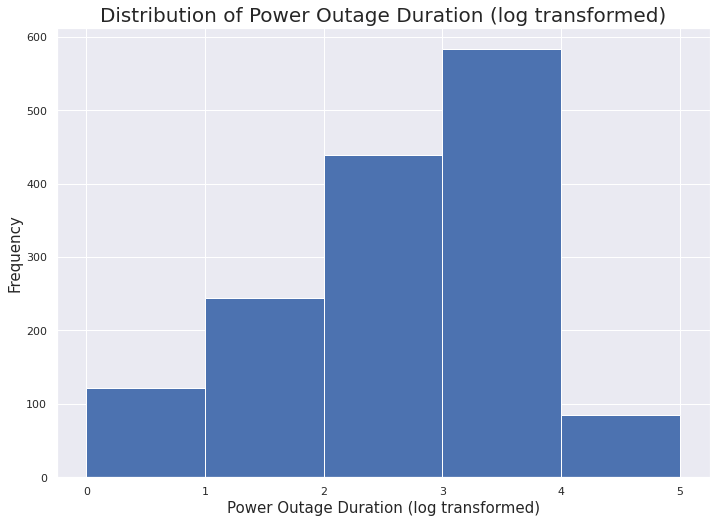

In [20]:
ax = df['out_level'].plot.hist(bins = 5)
ax.set_title('Distribution of Power Outage Duration (log transformed)', fontsize = 20)
ax.set_xlabel('Power Outage Duration (log transformed)', fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)

In [21]:
df['out_level'].value_counts()

3    583
2    439
1    244
0    121
4     84
5      1
Name: out_level, dtype: int64

The second way we decided to group the data was manually grouping the power outage durations into five different severity levels based on what we had thought, with level 1 being the least severe and level 5 being the most severe

In [22]:
def assign_severity(duration):
    if duration < 100:
        severe = 1
    elif duration >= 100 and duration < 500:
        severe = 2
    elif duration >= 500 and duration < 1500:
        severe = 3
    elif duration >= 1500 and duration < 5000:
        severe = 4
    else:
        severe = 5
    return severe
    
df['Severity'] = df['Outage_Duration_Mins'].apply(assign_severity)
df

,State,Region,Climate,Cause,Cause_Detail,Outage_Duration_Mins,out_level,Severity
0,MN,Central,normal,severe weather,NaN,3060.0,3,4
1,MN,Central,normal,intentional attack,attack,1.0,0,1
2,MN,Central,cold,severe weather,wind/rain,3000.0,3,4
3,MN,Central,normal,severe weather,thunder/lightning,2550.0,3,4
4,MN,Central,warm,severe weather,NaN,1740.0,3,4
...,...,...,...,...,...,...,...,...
1471,ID,Northwest,warm,intentional attack,attack,0.0,1,1
1472,ID,Northwest,normal,system operability disruption,uncontrolled loss,220.0,2,2
1473,ND,Central,cold,public appeal,NaN,720.0,2,3
1474,SD,Central,warm,islanding,NaN,59.0,1,1


Text(0, 0.5, 'Frequency')

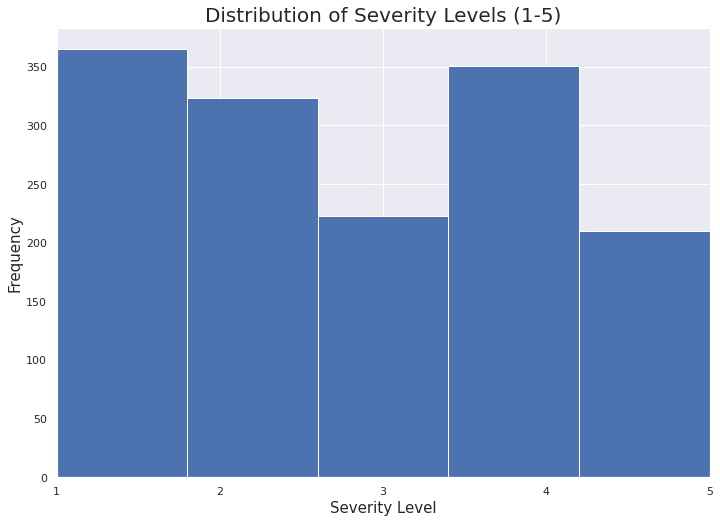

In [23]:
ax = df['Severity'].plot(kind = 'hist', bins = 5, xticks = (1, 2, 3, 4, 5), xlim = (1, 5))
ax.set_title('Distribution of Severity Levels (1-5)', fontsize = 20)
ax.set_xlabel('Severity Level', fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)

Because we want to predict the level of severity using the 'Region', 'Climate', and 'Cause' as inputs, we need to assign each observation a severity first so that we can check how accurate our prediction model is. 

We decided to group the values two different ways and when performing the prediction model, see which way is more effective. We performed a log transformation on the data and dividing it by log(10) and then from this value, separating them into groups between 0-10, 10-100, 100-1000, 1000-10000, and 10000+. We had decided that this would be the second way because after applying a log transformation to the data, the histogram is more normally distributed than the raw data, plotting just the duration time.

The other way we had done was that durations less than 100 minutes would be categorized as severity level of 1, between 100-500 minutes would be level 2, between 500-1500 would be level 3, and so on. We decided on this because when we had encountered power outages, the most we encountered were a few hours or just a few hundred minutes. However, we see in our data there are multiple observations with durations in the thousands and even ten thousand, so we decided to classify those at a higher level. 

After comparing the distributions, we want to plot the data and see it visually. Plotting Climate against the raw power outage duration, severity level, and the out_level below.

Text(0, 0.5, 'Climate')

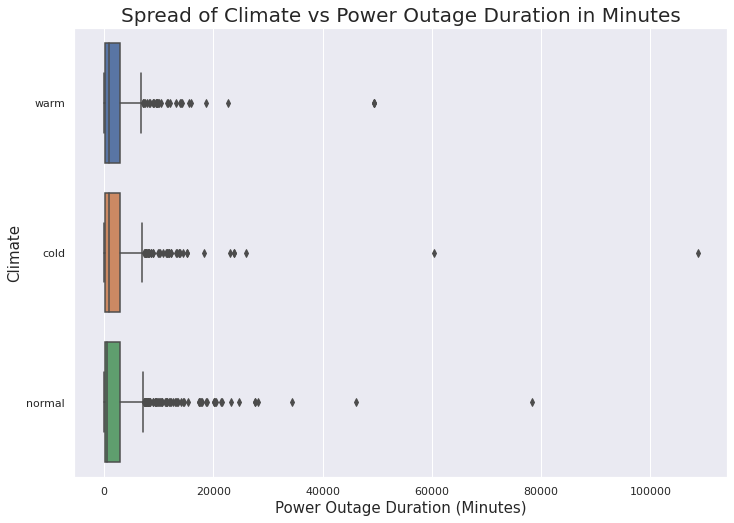

In [24]:
#Ordering the columns
order = ['warm', 'cold', 'normal']
#Climate vs Powr Outage (Mintues)
ax = sns.boxplot(y = 'Climate', x = 'Outage_Duration_Mins', data = df, order = order)
ax.set_title('Spread of Climate vs Power Outage Duration in Minutes', fontsize = 20)
ax.set_xlabel('Power Outage Duration (Minutes)', fontsize = 15)
ax.set_ylabel('Climate', fontsize = 15)

Text(0, 0.5, 'Climate')

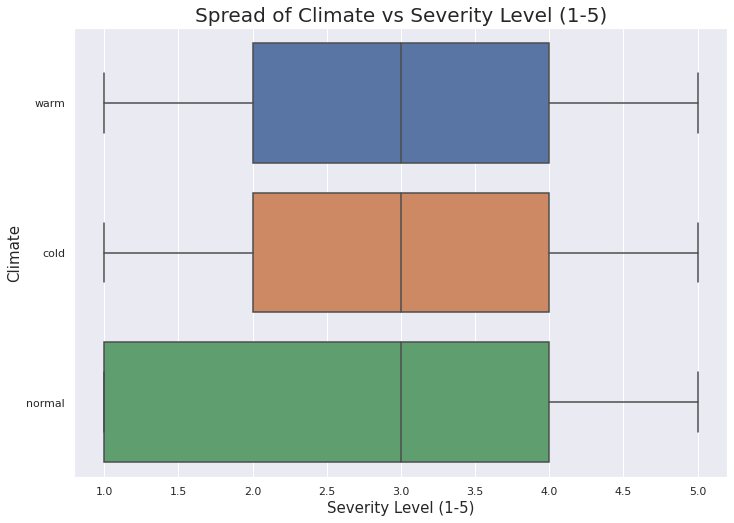

In [25]:
#Climate vs Severity
ax = sns.boxplot(y = 'Climate', x = 'Severity', data = df, order = order)
ax.set_title('Spread of Climate vs Severity Level (1-5)', fontsize = 20)
ax.set_xlabel('Severity Level (1-5)', fontsize = 15)
ax.set_ylabel('Climate', fontsize = 15)

Text(0, 0.5, 'Climate')

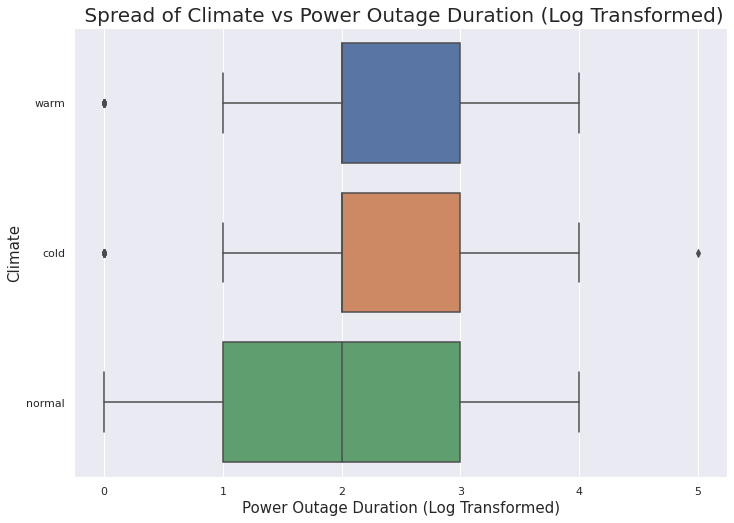

In [26]:
#Climate vs Power Outage (Log Transformed)
ax = sns.boxplot(y = 'Climate', x = 'out_level', data = df, order = order)
ax.set_title(' Spread of Climate vs Power Outage Duration (Log Transformed)', fontsize = 20)
ax.set_xlabel('Power Outage Duration (Log Transformed)', fontsize = 15)
ax.set_ylabel('Climate', fontsize = 15)

After performing a log transformation on the 'Outage_Duration_Mins' column, we see that it is much clearer than the original data. We see that the mean severity level of all three climates is around a 3 meaning that for all three climates, the mean outage duration time was between 500 and 1500 minutes.


After manually separating the observations into severity levels and performing the log transformations, we see that for the 'cold' and 'warm' climates, values are typically between 2 and 3 while for the 'normal' climates, it is between 1 and 3.

Comparing the three plots above, we see that it is much easier to work with the last two graphs than the first one. 

For the remaining of the plots, instead of plotting attributes against severity and power outage duration (log transformed), we will just plot against power outage duration (log transformed) because when grouping severity, we had done it based on what we had thought, however, using the log transformed data, the categories were based on calculations which may make it more accurate than severity.

Continuing with visualizing the data, for the remaining predictors, we are just using the out_level because as we saw before, it is more normal in distribution.

Text(0, 0.5, 'Region')

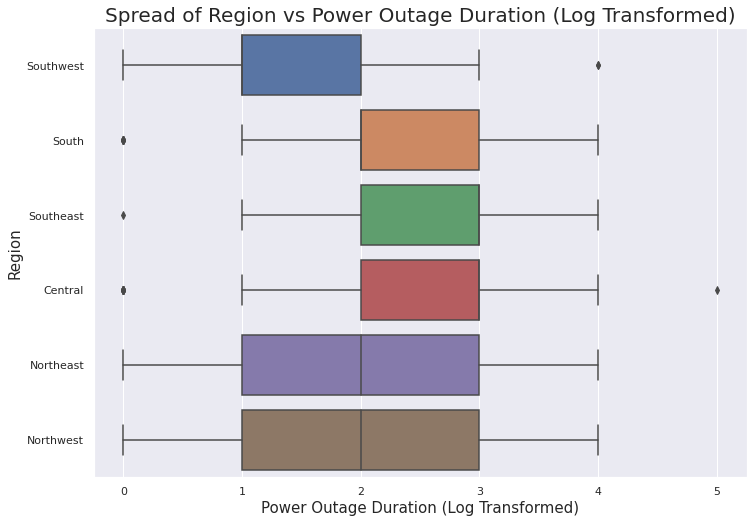

In [27]:
#Region vs Power Outage (Log Transformed)
ax = sns.boxplot(y = 'Region', x = 'out_level', data = df, order = ['Southwest', 'South', 'Southeast', 'Central' , 'Northeast', 'Northwest'])
ax.set_title('Spread of Region vs Power Outage Duration (Log Transformed)', fontsize = 20)
ax.set_xlabel('Power Outage Duration (Log Transformed)', fontsize = 15)
ax.set_ylabel('Region', fontsize = 15)

From this plot above, we see that no single 'Region' has an extremely low or high mean or median. This allows us to proceed with our project, because we do not find any bias present, as from the plot above, there are only a few outliers, which is too be expected. We would conclude that there would be bias if a single region had an extremely low or high mean power outage duration because that would suggest that the data differs from the rest significantly and has possibly been tampered with. 

Text(0, 0.5, 'Cause')

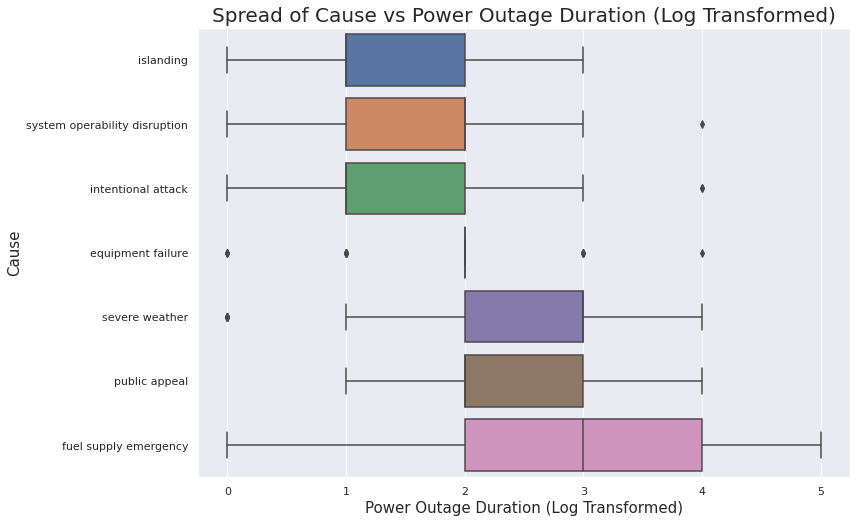

In [28]:
#Cause vs Power Outage (Log Transformed)
ax = sns.boxplot(y = 'Cause', x = 'out_level', data = df, order = ['islanding', 'system operability disruption', 'intentional attack', 'equipment failure', 'severe weather', 'public appeal', 'fuel supply emergency'])
ax.set_title('Spread of Cause vs Power Outage Duration (Log Transformed)', fontsize = 20)
ax.set_xlabel('Power Outage Duration (Log Transformed)', fontsize = 15)
ax.set_ylabel('Cause', fontsize = 15)

Text(0, 0.5, 'Cause Detail')

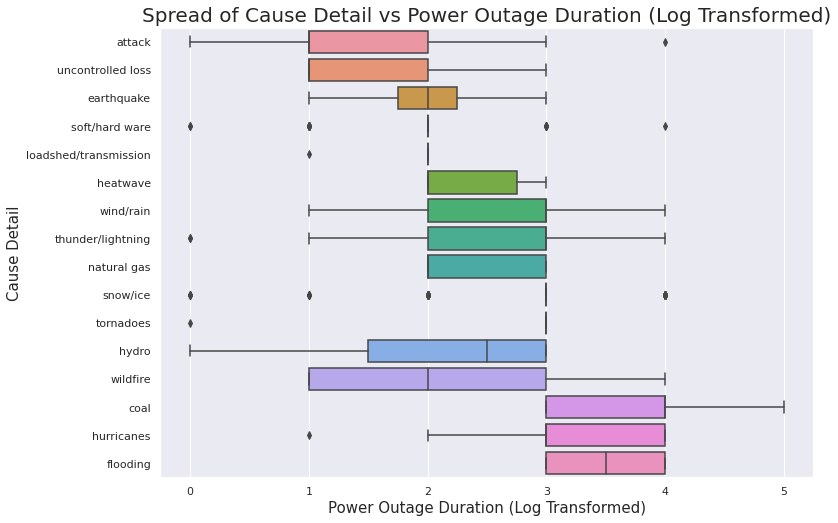

In [29]:
#Cause Detail vs Power Outage (Log Transformed)
order = ['attack', 'uncontrolled loss', 'earthquake', 'soft/hard ware', 'loadshed/transmission', 'heatwave', 'wind/rain', 'thunder/lightning', 'natural gas', 'snow/ice', 'tornadoes', 'hydro', 'wildfire', 'coal', 'hurricanes', 'flooding']
ax = sns.boxplot(y = 'Cause_Detail', x = 'out_level', data = df, order = order)
ax.set_title('Spread of Cause Detail vs Power Outage Duration (Log Transformed)', fontsize = 20)
ax.set_xlabel('Power Outage Duration (Log Transformed)', fontsize = 15)
ax.set_ylabel('Cause Detail', fontsize = 15)

From the first graph of Region vs Power Outage Duration (log transformed), we don't really get much information from it. The only thing we can tell is that the mean duration times are roughly similar, leading us to believe that Region doesn't really play a role in predicting power outage duration. 

In the second graph of Cause vs Power Outage Duration (log transformed), we see that fuel supply emergency has the highest mean out of all the causes with severe weather being second. 

From the third graph, we see that the Cause_Detail of coal and flooding have the two highest means out of all the cause detail categories. 

From the second and third graphs, we start to believe that our original hypothesis that severe weather has the most influence on the power outage duration was wrong, and that fuel supply emergency, specifically coal, is a more significant predictor than severe weather, however, so far we are just speculating. 

After visualizing the spread of the data, we want to get a sense of the grouping the observations by the Region and the Cause and obtaining the highest median in each group

In [30]:
grouped = df.groupby(by = ['Region', 'Cause']).agg('median')[['Outage_Duration_Mins']]
grouped

Outage_Duration_Mins
Region    Cause                                              
Central   equipment failure                             168.0
          fuel supply emergency                       10354.0
          intentional attack                             95.5
          islanding                                      56.0
          public appeal                                 554.0
          severe weather                               2818.0
          system operability disruption                  65.0
Northeast equipment failure                             159.0
          fuel supply emergency                       14400.0
          intentional attack                              1.0
          islanding                                     881.0
          public appeal                                2760.0
          severe weather                               3189.0
          system operability disruption                 234.5
Northwest equipment failure                             702.0
          fuel supply emergency                           1.0
          intentional attack                             74.0
          islanding                                      21.0
          public appeal                                 898.0
          severe weather                               3507.0
          system operability disruption                 157.5
South     equipment failure                             227.0
          fuel supply emergency                       20160.0
          intentional attack                            100.0
          islanding                                     493.5
          public appeal                                 430.0
          severe weather                               2100.0
          system operability disruption                 373.0
Southeast equipment failure                             308.5
          intentional attack                            108.0
          public appeal                                4320.0
          severe weather                               1355.0
          system operability disruption                 110.0
Southwest equipment failure                              67.5
          fuel supply emergency                          76.0
          intentional attack                             56.0
          islanding                                       2.0
          public appeal                                2275.0
          severe weather                               2425.0
          system operability disruption                 284.0
West      equipment failure                             353.0
          fuel supply emergency                         882.5
          intentional attack                            108.0
          islanding                                     128.5
          public appeal                                 420.0
          severe weather                                962.0
          system operability disruption                 206.0

In [31]:
ce_max = grouped.loc['Central']['Outage_Duration_Mins'].max()
ne_max = grouped.loc['Northeast']['Outage_Duration_Mins'].max()
nw_max = grouped.loc['Northwest']['Outage_Duration_Mins'].max()
s_max = grouped.loc['South']['Outage_Duration_Mins'].max()
se_max = grouped.loc['Southeast']['Outage_Duration_Mins'].max()
sw_max = grouped.loc['Southwest']['Outage_Duration_Mins'].max()
w_max = grouped.loc['West']['Outage_Duration_Mins'].max()

grouped[grouped['Outage_Duration_Mins'].isin({ce_max, ne_max, nw_max, s_max, sw_max, w_max})]


,,Outage_Duration_Mins
Region,Cause,
Central,fuel supply emergency,10354.0
Northeast,fuel supply emergency,14400.0
Northwest,severe weather,3507.0
South,fuel supply emergency,20160.0
Southwest,severe weather,2425.0
West,severe weather,962.0


From the cells above, we see that fuel supply emergency and severe weather have been the cause of a long power outage duration time. In the 'Central', 'Northeast', and 'South' regions, the 'fuel supply emergency' cause resulted in the longest median power outage duration with a range of 10,000 - 20,000 minutes. In the 'Northwest', 'Southwest', and 'West' regions, we see that severe weather played a significant role in the power outage duration with approximately between a median range of 900 - 3,500 minutes. 

Doing the same with Climate, we group each observation by the Climate and the Cause and aggregate them by the medians.

In [32]:
grouped = df.groupby(by = ['Climate', 'Cause']).agg('median')[['Outage_Duration_Mins']]
grouped

Outage_Duration_Mins
Climate Cause                                              
cold    equipment failure                             182.0
        fuel supply emergency                        7965.0
        intentional attack                             92.0
        islanding                                     193.0
        public appeal                                1092.5
        severe weather                               2319.5
        system operability disruption                 214.0
normal  equipment failure                             214.5
        fuel supply emergency                        2617.5
        intentional attack                             15.0
        islanding                                      32.0
        public appeal                                 495.0
        severe weather                               2511.0
        system operability disruption                 224.0
warm    equipment failure                             681.0
        fuel supply emergency                       18717.0
        intentional attack                             73.0
        islanding                                      78.5
        public appeal                                 300.0
        severe weather                               2520.0
        system operability disruption                 197.5

In [33]:
c_max = grouped.loc['cold']['Outage_Duration_Mins'].max()
n_max = grouped.loc['normal']['Outage_Duration_Mins'].max()
w_max = grouped.loc['warm']['Outage_Duration_Mins'].max()

grouped[grouped['Outage_Duration_Mins'].isin({c_max, n_max, w_max})]

,,Outage_Duration_Mins
Climate,Cause,
cold,fuel supply emergency,7965.0
normal,fuel supply emergency,2617.5
warm,fuel supply emergency,18717.0


When grouping by the Region and the Cause, we guess that either severe weather or fuel supply emergency is the largest influence on the power outage duration. 

When grouping the Climate and the Cause, we guess that fuel supply emergency is the largest predictor of the power outage duration.

However, both of the guesses above, are purely from speculation, as we are just looking at the distributions and observations of the data. 

# Data Analysis & Results

Performing OLS Regression, we begin with comparing the out_level and the Cause category. As mentioned earlier, we will be using the out_level (the log transformed power outage duration time) because the data is a more normal distribution and was grouped through calculations instead of manually. 

In [34]:
c_outcome, c_predictors = patsy.dmatrices('out_level ~ C(Cause)', data = df)
c_mod = sm.OLS(c_outcome, c_predictors)  
c_res = c_mod.fit()
print(c_res.summary())

                            OLS Regression Results                            
Dep. Variable:              out_level   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     164.2
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          1.09e-159
Time:                        12:01:02   Log-Likelihood:                -1774.8
No. Observations:                1472   AIC:                             3564.
Df Residuals:                    1465   BIC:                             3601.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

From analyzing the greatest median power outage duration times, we speculated that the cause of severe weather or fuel supply emergency would be the most significant predictors. To test this, we separate the 'Cause' column into just considering severe weather or fuel supply emergency and then compare it against the 'out_level' column. 

Out_level vs Severe Weather is below

In [35]:
weather = df[df['Cause'] == 'severe weather']
we_outcome, we_predictors = patsy.dmatrices('out_level ~ C(Cause_Detail)', data = weather)
we_mod = sm.OLS(we_outcome, we_predictors)  
we_res = we_mod.fit()
print(we_res.summary())

                            OLS Regression Results                            
Dep. Variable:              out_level   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     7.280
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           4.76e-10
Time:                        12:01:02   Log-Likelihood:                -594.49
No. Observations:                 566   AIC:                             1209.
Df Residuals:                     556   BIC:                             1252.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Out_level vs Fuel Supply Emergency is below

In [36]:
supply = df[df['Cause'] == 'fuel supply emergency']
su_outcome, su_predictors = patsy.dmatrices('out_level ~ C(Cause_Detail)', data = supply)
su_mod = sm.OLS(su_outcome, su_predictors)  
su_res = su_mod.fit()
print(su_res.summary())

                            OLS Regression Results                            
Dep. Variable:              out_level   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     12.06
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           0.000325
Time:                        12:01:02   Log-Likelihood:                -25.759
No. Observations:                  24   AIC:                             57.52
Df Residuals:                      21   BIC:                             61.05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Using an alpha of 0.01, in the last model, we see that only the fuel supply emergency and severe weather cause categories are significant predictors when compared against equipment failure. This confirms what was predicted when we had just looked at the largest medians in each cause category. 

We see that in the severe weather cause category that flooding and heatwaves are the only significant predictors when comparing to earthquakes. Additionally, we see that when comparing severe weather and power outage duration, we get an R-squared value of 0.105. 

Continuing using an alpha of 0.01, we see that in the fuel supply emergency category, both hydro or natural gas are significant predictors when comparing to coal. The R-squared is 0.535. 

When comparing the two cause categories, severe weather and fuel supply emergency, we see that fuel supply emergency does a better job of explaining the variance throughout the data with an R-squared value of 0.535 vs 0.105. This is not at all what we thought originally. We did not think that fuel supply emergency would pose a significant problem because we had hypothesized that electric companies would always take into account the energy supply and always have a backup. 

Because we want to figure out which predictor, 'Region', 'Climate', or 'Cause' is the greatest predictor in power outage duration, we need to compare how well each individual predictor does against the data and then collectively compare the three. 

Below, we have performed three OLS Regression models of the 'out_level' column vs the 'Cause Detail' separately. 

In [37]:
cd_outcome, cd_predictors = patsy.dmatrices('out_level ~ C(Cause_Detail)', data = df)
cd_mod = sm.OLS(cd_outcome, cd_predictors)  
cd_res = cd_mod.fit()
print(cd_res.summary())

                            OLS Regression Results                            
Dep. Variable:              out_level   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     57.07
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          3.56e-123
Time:                        12:01:03   Log-Likelihood:                -1213.3
No. Observations:                1024   AIC:                             2459.
Df Residuals:                    1008   BIC:                             2538.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

The OLS Regression Results above show that the R-squared is 0.459. This means that using just the 'Cause_Detail' category, it explains 45.9% of the variance in the data. 

'Out_level" vs 'Climate' is below

In [38]:
cl_outcome, cl_predictors = patsy.dmatrices('out_level ~ C(Climate)', data = df)
cl_mod = sm.OLS(cl_outcome, cl_predictors)  
cl_res = cl_mod.fit()
print(cl_res.summary())

                            OLS Regression Results                            
Dep. Variable:              out_level   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.344
Date:                Sat, 12 Dec 2020   Prob (F-statistic):             0.0356
Time:                        12:01:03   Log-Likelihood:                -2150.0
No. Observations:                1472   AIC:                             4306.
Df Residuals:                    1469   BIC:                             4322.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.2549 

We see above, that the R-squared value is 0.005, meaning that just with the Climate, it does not explain the variance of the data very well

'Out_level' vs 'Region' is below

In [39]:
r_outcome, r_predictors = patsy.dmatrices('out_level ~ C(Region)', data = df)
r_mod = sm.OLS(r_outcome, r_predictors)  
r_res = r_mod.fit()
print(r_res.summary())

                            OLS Regression Results                            
Dep. Variable:              out_level   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     22.75
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           9.12e-26
Time:                        12:01:03   Log-Likelihood:                -2087.8
No. Observations:                1472   AIC:                             4190.
Df Residuals:                    1465   BIC:                             4227.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2

Similarly, we see above that just the 'Region' and the 'out_level' also have a small R-squared value, meaning that with just the Region it does not fit the data very well

After comparing the three predictors separately, we combine the three categories and see how well they all do at predicting the data.

In [40]:
outcome, predictors = patsy.dmatrices('out_level ~ C(Region) + C(Climate) + C(Cause)', data = df)
mod = sm.OLS(outcome, predictors)  
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              out_level   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     72.49
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          6.03e-156
Time:                        12:01:04   Log-Likelihood:                -1764.3
No. Observations:                1472   AIC:                             3559.
Df Residuals:                    1457   BIC:                             3638.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

From the three different OLS models generated above, we see that both the 'Region' and 'Climate' columns, alone, do not fit the data very well as both R-squared values are very close to 0. 

Additionally, from each OLS model separately, we can see which categories are significant and which are not. In the OLS model directly above, of 'out_level' vs 'Region', we see that when compared to the 'Central' region, all except the 'South' and 'Southeast' regions are not significant predictors with small p-values. This is not surprising because we had also thought that Region would play a small role in power outage duration because, in smaller rural areas, it may take longer times to respond and fix a power outage.

Comparing the OLS model of 'Region', 'Climate', and 'Cause', the 'Cause' and 'Cause_Detail' columns have the greatest R-squared values at 0.4 and 0.459 respectively. In the last OLS model, combining all three categories, we see that all of the 'Cause' categories have a p-value less than an alpha of 0.01, with the exception of the 'public appeal' and 'system operability disruption'. The 'public appeal' category has a p-value of 0.015 meaning that it is not that far from being significant and the 'system operability disruption' category has a high p-value of 0.736. This could possibly mean that there may be many outliers present in this category causing it to not be a significant predictor. 

When compared against the other attributes of 'Region' and 'Climate', we see that the 'Cause' category is really the only attribute that is a significant predictor for power outage duration. This is in line with our hypothesis that out of the three, 'Cause' will be the most significant.

From above, we had found that the 'Cause' category is the most significant predictor, however, we are still choosing to use the 'Region', 'Climate', and 'Cause' as inputs to our regression model, because we believe that even though they may not add much information to the predictor, they will still add a little bit of information. Additionally, we did not include the 'Cause_Detail' as a predictor because it had contained NaN values and we did not want to drop these observations just to add them into the predictor because by dropping the 400+ observations, we would also be dropping 400+ observations with valid 'Region', 'Climate', and 'Cause' values.

In [41]:
#Shuffling the data so there is no bias in the prediction

shuffled_df = df.sample(frac = 1) 

In [42]:
df2 = shuffled_df[['Region','Climate','Cause','Outage_Duration_Mins', 'Severity', 'out_level']]
sum(df2[df2['Cause']=='intentional attack']['Outage_Duration_Mins'])/len(df2[df2['Cause']=='intentional attack']['Outage_Duration_Mins'])

429.9801488833747

In [43]:
#Splitting the data into training and testing data

num_train = int(len(df2) * 0.8)
num_test = len(df2) - num_train
num_train

1177

In the cell below, we are building the model. Because our predictors are categorical variables, we use one hot encoding and use the resulting matrix as features for the predictor. 

In [44]:
cats = Pipeline([
    ('ohe', OneHotEncoder(sparse=False)), 
    ('pca', PCA(svd_solver='full'))
])
catcols = ['Region','Climate','Cause']
ct = ColumnTransformer([('cat', cats, catcols)])
pl = Pipeline([('feats', ct), ('lr', LinearRegression())])

After building the model, we need to fit the Linear Regression Model. We fit the model with only the training data, that is 80% of the data that we have which is 1177 observations, saving the last 20% as validation data.

In [45]:
#Fitting the model only with the training data

pl.fit(df2.drop('Outage_Duration_Mins', axis=1)[:num_train], shuffled_df['Outage_Duration_Mins'][:num_train])

Pipeline(memory=None,
         steps=[('feats',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('ohe',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='error',
                                                                                 sparse=False)),
                                                           

In [46]:
#Then predict power outage duration using the training and testing data

train = pl.predict(df2.drop('Outage_Duration_Mins',axis=1)[:num_train])
test = pl.predict(df2.drop('Outage_Duration_Mins',axis=1)[num_train:])

In [47]:
#Grouping the predicted power outage duration into severity levels and comparing it with the original data
#Training data
train_predict = (pd.Series(train)).apply(assign_severity)
actual = shuffled_df['Severity'][:num_train].reset_index()['Severity']
print(classification_report(train_predict, actual))

              precision    recall  f1-score   support

           1       0.21      0.41      0.28       149
           2       0.15      0.21      0.17       184
           3       0.12      0.13      0.13       171
           4       0.84      0.38      0.53       633
           5       0.10      0.42      0.17        40

    accuracy                           0.32      1177
   macro avg       0.29      0.31      0.25      1177
weighted avg       0.52      0.32      0.37      1177



In [48]:
#Grouping the predicted power outage duration into severity levels and comparing it with the original data
#Testing data
test_predict = (pd.Series(test)).apply(assign_severity)
validate = shuffled_df['Severity'][num_train:].reset_index()['Severity']
print(classification_report(test_predict, validate))

              precision    recall  f1-score   support

           1       0.23      0.35      0.28        48
           2       0.17      0.24      0.20        46
           3       0.15      0.15      0.15        48
           4       0.66      0.29      0.40       146
           5       0.07      0.43      0.12         7

    accuracy                           0.27       295
   macro avg       0.25      0.29      0.23       295
weighted avg       0.41      0.27      0.30       295



We see that from the two classification reports above, that when predicting the severity level, using 80% of the data as training data to fit the model, we had gotten an accuracy of around 33% for the training data and around 31% accuracy for the test data when testing whether we would be able to predict the severity level. 

In [49]:
#Log transforming the predicted power outage duration and comparing it with the original data
#Training data
train_predict = (pd.Series(train)).apply(change)
actual = shuffled_df['out_level'][:num_train].reset_index()['out_level']
print(classification_report(train_predict, actual))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.22      0.29      0.25       149
           2       0.22      0.29      0.25       261
           3       0.87      0.55      0.68       736
           4       0.16      0.39      0.23        31
           5       0.00      0.00      0.00         0

    accuracy                           0.46      1177
   macro avg       0.25      0.25      0.23      1177
weighted avg       0.63      0.46      0.52      1177



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
#Log transforming the predicted power outage duration and comparing it with the original data
#Testing data
test_predict = (pd.Series(test)).apply(change)
validate = shuffled_df['out_level'][num_train:].reset_index()['out_level']
print(classification_report(test_predict, validate))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.22      0.23      0.22        48
           2       0.22      0.27      0.25        73
           3       0.80      0.57      0.67       168
           4       0.27      0.50      0.35         6

    accuracy                           0.44       295
   macro avg       0.30      0.31      0.30       295
weighted avg       0.55      0.44      0.48       295



However, when testing whether we would be able to predict the log transformed duration time, still using 80% of the data as training data to fit the model, we had gotten an accuracy of around 45% for the training data and around 43% accuracy for the test data.  

Summarizing the results: 

Severity Level Prediction: (accuracy scores)

    Training data: ~33%
    
    Test data: ~30%
    
Out Level Prediction: (accuracy scores)

    Training data: ~45%
    
    Test data: ~43%

We see that predicting the out_level (the power outage duration log transformed) was more accurate. We believe this because when we had transformed the data, we had mathematically grouped the observations. However, with the severity level, we had grouped them manually, based on what we had considered being a particular severity level. 

# Ethics & Privacy

The data we used in this project is made available to the public with no additional information on restrictions of use from the Purdue website. This dataset consists of power outage information with many variables, such as outage duration and the cause. In terms of data privacy, in publicly made datasets, personally identifiable information should have been already removed. We took this into consideration and made sure to check the data to ensure that all private information was removed. The data does not consist of any personally identifiable information (PII) as we are focusing on analyzing what predictors and whether or not we can use these predictors to determine the severity level and duration of a power outage. The observations do include a location, however, the location is a broad area, being the state that the outage had occurred in, not the specific coordinates or neighborhood. 

As for ethics, we are using data from the years 2000 - 2016. This does affect our study a little bit because infrastructure and technology are advancing every day allowing for the continuous use of electricity. We are aware that this is a limitation in our data for being unable to account for infrastructure advances that may increase and decrease the flow of electricity. Ethical challenges arise when opinions on how to utilize this application diverge. Because this application analyzes and predicts the power outage duration when given an input of the 'Region', 'Climate', and 'Cause', it should not be used to exploit areas with a longer power outage and taking advantage of residents in that state. 

Because we are not given the information on who had collected the data, there may have been bias in the data. For instance, if a specific company had collected their data, they are more likely to modify the data in their particular region than if the US Department of Energy had collected the data. We did our best to make sure there weren't any biases. We had looked at the distribution of the data with respect to 'Region'. We had thought this was the best way to see if there were any biases present in our data because an electric company is responsible for a particular area, specifically the area they are located in, if they were to tamper with data, they would most likely tamper with data in their own area. Therefore, by looking at the data with respect to location, we are able to visualize which data points in a particular state or region was abnormal and may be considered outliers. In the plot of 'Region' vs 'Out_level, fortunately, we did not find any abnormal points and any of the outliers that were identified were only related to that specific observation. 

# Conclusion & Discussion

#### Conclusion
Parts of our hypothesis were correct and parts were incorrect. The first part of our hypothesis stating that Cause would be the most significant predictor was correct, however, which Cause we be the most significant was incorrect. We had believed that with uncontrollable weather patterns and unforeseen disasters, severe weather would be the most significant predictor for predicting power outage duration times. However, we had found out that the severe weather cause was second to that of fuel supply emergency. Fuel supply emergency is when the electric company has run out of electricity to supply to its customers. This was extremely surprising to us because we had thought that an electric company would carefully track its supply and have backups in case any resources had run out. 

For the second part of our hypothesis, we had believed that our prediction model would have an accuracy of hopefully 60% or more. However, in the cells above, we clearly see that we were extremely incorrect. We had implemented two models. One predicting the severity level and one predicting the log transformed duration times. For severity level, we had manually grouped each observation. We had decided on the range for five severity levels without looking at the data. This resulted in five groups with between 200-300 observations in each group. As for the log transformed outage duration times, we had taken the log of the duration and then divided it by the log(10). By doing this, our data was transformed into a more normal distribution than the raw duration time or the severity level. 

For both predictions, we had used Linear Regression. For predicting severity level, the training data had gotten around a 33% accuracy while the testing data had gotten around a 30% accuracy. We see that this is almost half of what we were hoping to achieve. For predicting the log transformed duration time, the training data had gotten around a 45% accuracy while the testing data had gotten around 43%. While this was not as high as we would like it to be, it was still better than when predicting the severity level. 

We believe that predicting the log transformed duration time was more accurate than the severity level because the log transformed duration time was in a more normal distribution than the severity level was and that the log transformed duration time was grouped based on calculations while the severity level was decided by us and what we had thought to be the different levels of severity. 

As for our results from this project, we had found that it was not severe weather that was the most significant predictor, but instead, fuel supply emergency had a bigger impact. Additionally, because our accuracy was only around 43%, we cannot vouch for the success of predicting the severity level using the 'region', 'climate', and the 'cause'. Nevertheless, we firmly believe that if we had a bigger dataset, that our model would achieve higher accuracy and that it would be successful in predicting the severity level with an accuracy greater than 60%. 

#### Discussion and Limitations
For our project, we had a few limitations. The data that we had found was only from January 2000 to July 2016. This is a limitation because it does not include anything after July 2016 and with the world advancing in technology and infrastructure every day, the causes of power outage change every day. Because of this limitation, our analysis and predictor may not be as accurate as if we had implemented data from previous years up to this year, 2020. For instance, we had found that fuel supply emergency was the most significant predictor for power outage duration, however, possibly in the recent 4 years, electric companies had taken enlargened their supply and kept better track of their resources, decreasing the influence fuel supply emergency has on a power outage.

Another limitation that we had come across was the number of observations used in the analysis and predictor. The ideal data set that we had in mind would have had around 5000+ observations with numerous attributes, however, the data set we had found set had originally, 1534 observations. After cleaning the data and dropping the missing data, there were 1472 observations. Due to the small number of observations, our prediction model is not as general as we would like it to be because the more data we are able to train our model with, the more accurate it becomes. We had attempted to remedy this limitation by adding additional data sets. However, combining other data sets resulted in new problems. We were unable to find a data set with similar attributes of 'Region', 'Climate', and etc. Additionally, data sets that did have similar attributes had grouped each observation differently. For instance, a data set may have only had 5 different region categories (North, South, East, West, Central) while our original data set had regions, such as northwest, northeast as well. Because we didn't want to introduce bias by grouping combining or splitting up categories in our project, we ultimately choose to use one data set.

# Team Contributions

- Kaishun Lin      - Research question, data set, data analysis and model, proofreading
- Yuheng Yang      - Data analysis and model, conclusion & discussion, proofreading
- Yicun Wu         - Hypothesis, data cleaning, data analysis, proofreading 
- Kasen Teoh       - Background, data cleaning, ethics and privacy, proofreading